# Image Fundamentals

Images are basically 2D or 3D arrays where each element in the array represent a pixel value

## Grey scale Image

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

pd.set_option('display.max_colwidth', None)

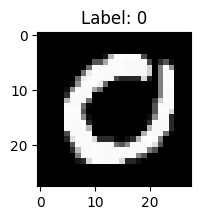

    0   1   2   3   4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24  25  26  27
0    0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0
1    0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0
2    0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0
3    0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0
4    0   0   0   0   0    0    0    0    0    0    0    0   22  183  252  254  252  252  252   76    0    0    0    0    0   0   0   0
5    0   0   0   0   0    0    0    0    0    0   85   85  168  250  250  252  250  250  250  250   71    0   43   85   14   0   0   0
6    0   0   0   0   0    0    0    0    0  107  252  2

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
i = 121

plt.figure(figsize=(2,2))
plt.imshow(x_train[i], cmap='gray')
plt.title(f"Label: {y_train[i]}")
plt.show()
data = pd.DataFrame(x_train[i])
print(data.to_string())

## Black and White image

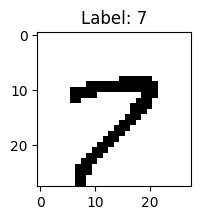

     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27
0   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
1   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
2   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
3   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
4   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
5   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255

In [ ]:
x_train[i] = np.where(x_train[i] > 128, 0, 255)

plt.figure(figsize=(2,2))
plt.imshow(x_train[i], cmap='gray')
plt.title(f"Label: {y_train[i]}")
plt.show()
data = pd.DataFrame(x_train[i])
print(data.to_string())

Please submit your feedback via https://futurepicx.com/feedback?id=2487AD91-5429-431C-902C-451AD5055F1A

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Activation
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Preprocess the data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7358 - loss: 4.1336 - val_accuracy: 0.8840 - val_loss: 0.4813
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8938 - loss: 0.3947 - val_accuracy: 0.9258 - val_loss: 0.3160
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9290 - loss: 0.2571 - val_accuracy: 0.9338 - val_loss: 0.2640
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9431 - loss: 0.2043 - val_accuracy: 0.9426 - val_loss: 0.1994
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9546 - loss: 0.1669 - val_accuracy: 0.9429 - val_loss: 0.2197
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9585 - loss: 0.1478 - val_accuracy: 0.9509 - val_loss: 0.1901
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9637 - loss: 0.1250 - val_accuracy: 0.9558 - val_loss: 0.1686
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9679 - loss: 0.1138

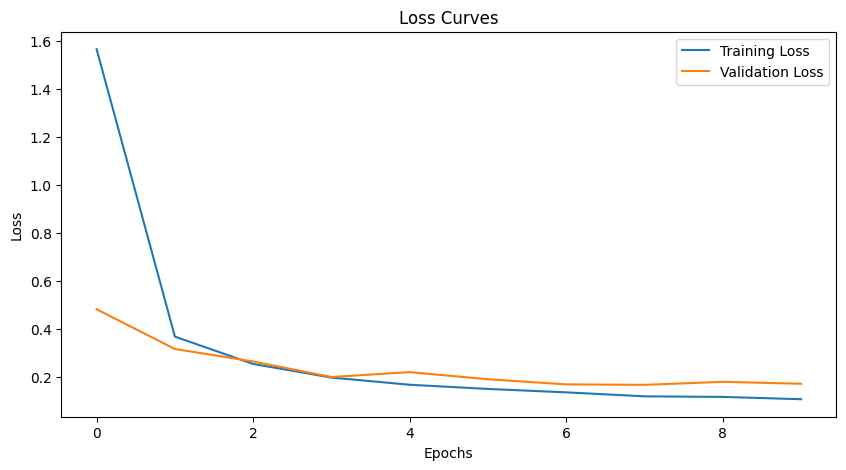

In [ ]:
# Plot train and test loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
index =121
probs = model.predict(x_test[index].reshape(1,28,28,1))
print(probs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
[[5.0288881e-04 7.5911967e-20 3.5316637e-04 2.1485703e-06 9.9814296e-01
  5.5673398e-05 2.9153018e-05 1.2543494e-07 9.0930313e-05 8.2293176e-04]]


In [ ]:
np.argmax(probs)

np.int64(4)

In [ ]:
model.save('my_model.keras')